In [80]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import requests
from time import time
from threading import Thread
from nltk import WordNetLemmatizer as wordnl

In [81]:
dataset = pd.read_csv("terminated_trials.csv")

In [82]:
dataset.head(3)

,Rank,NCT Number,Title,Acronym,Recruitment,Study Results,Conditions,Interventions,Outcome Measures,Sponsor/Collaborators,...,Completion Date,Last Verified,First Submitted,First Posted,Results First Submitted,Results First Posted,Last Update Submitted,Last Update Posted,Locations,URL
0,1,NCT03427073,Dose-escalation Study of ALM201 in Patients Wi...,NaN,Terminated,No Results Available,Solid Tumors|Ovarian Cancer,Drug: ALM201,Characterization of the safety and tolerabilit...,Almac Discovery,...,"March 13, 2017",February 2018,"March 5, 2015","February 9, 2018",NaN,NaN,"February 2, 2018","February 9, 2018","Centre for Cancer Research and Cell Biology, Q...",https://ClinicalTrials.gov/show/NCT03427073
1,2,NCT03411460,Satisfaction of Hospitalized Diabetic Patients...,GLUCO FLASH,Terminated,No Results Available,Insulin-Dependent Diabetes,Device: FreeStyle Libre™ system|Procedure: Fin...,Satisfaction of patient-determined hospital ca...,Centre Hospitalier Universitaire de Nīmes,...,"August 23, 2017",January 2017,"June 16, 2017","January 26, 2018",NaN,NaN,"January 25, 2018","January 26, 2018","CHU Nimes, Nîmes, France",https://ClinicalTrials.gov/show/NCT03411460
2,3,NCT03411447,Impact of Early Enteral vs. Parenteral Nutriti...,NaN,Terminated,No Results Available,Acute Respiratory Failure|Shock,Other: Parenteral nutrition|Other: Enteral nut...,proportion of patients with abundant microaspi...,Centre Hospitalier Departemental Vendee|Minist...,...,"July 7, 2015",January 2018,"July 18, 2017","January 26, 2018",NaN,NaN,"January 25, 2018","January 26, 2018","CHU Amiens, Amiens, France|Centre hospitalier ...",https://ClinicalTrials.gov/show/NCT03411447


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14992 entries, 0 to 14991
Data columns (total 30 columns):
Rank                       14992 non-null int64
NCT Number                 14992 non-null object
Title                      14992 non-null object
Acronym                    3253 non-null object
Recruitment                14992 non-null object
Study Results              14992 non-null object
Conditions                 14992 non-null object
Interventions              13968 non-null object
Outcome Measures           14140 non-null object
Sponsor/Collaborators      14992 non-null object
Gender                     14978 non-null object
Age                        14992 non-null object
Phases                     10346 non-null object
Enrollment                 14763 non-null float64
Funded Bys                 14992 non-null object
Study Type                 14992 non-null object
Study Designs              14923 non-null object
Other IDs                  14991 non-null object
Start Date

In [42]:
termination_reason = []
c=1
ti=time()
def fun():
    while True:
        i = q.get()
        page = requests.get(i)
        soup = BeautifulSoup(page.text, 'html.parser')
        why_stop = soup.find_all(class_='not-recruiting-status')
        temp=str(why_stop[0])
        if temp.find("(")==-1:
            reason=np.nan
        else:
            reason = temp.split("(")[1].split(")")[0]
        termination_reason.append(reason)
        print("page: "+str(c)+" "+str(time()-ti))
        c=c+1
        ti=time()
        q.task_done()
        
for i in range(20):
    t=Thread(target=fun)
    t.daemon=True
    t.start()
    

In [139]:
page = requests.get(dataset['URL'][5])
soup = BeautifulSoup(page.text, 'html.parser')
why_stop = soup.find_all(class_='not-recruiting-status')
why_stop

[<div class="not-recruiting-status">
 <span class="term" data-term="Recruitment Status: Clinical Study" style="display:inline;" title="Show definition">Recruitment Status <i aria-hidden="true" class="fa fa-info-circle term" data-term="Recruitment Status: Clinical Study"></i></span>
 : 
                     Terminated
                   
       <!--
         <div class="status-details">(a respiratory depression in remifentanyl group)
 -->
         (a respiratory depression in remifentanyl group)
                 
   <div style="font-size:inherit">
 <span class="term" data-term="First Posted" style="display:inline;" title="Show definition">First Posted <i aria-hidden="true" class="fa fa-info-circle term" data-term="First Posted"></i></span>
 : January 17, 2018</div>
 <div style="font-size:inherit">
 <span class="term" data-term="Last Update Posted" style="display:inline;" title="Show definition">Last Update Posted <i aria-hidden="true" class="fa fa-info-circle term" data-term="Last Updat

In [140]:
print(why_stop[0])
print("\n\n")
a=str(why_stop[0])
a.split("(")[1].split(")")[0]

<div class="not-recruiting-status">
<span class="term" data-term="Recruitment Status: Clinical Study" style="display:inline;" title="Show definition">Recruitment Status <i aria-hidden="true" class="fa fa-info-circle term" data-term="Recruitment Status: Clinical Study"></i></span>
: 
                    Terminated
                  
      <!--
        <div class="status-details">(a respiratory depression in remifentanyl group)
-->
        (a respiratory depression in remifentanyl group)
                
  <div style="font-size:inherit">
<span class="term" data-term="First Posted" style="display:inline;" title="Show definition">First Posted <i aria-hidden="true" class="fa fa-info-circle term" data-term="First Posted"></i></span>
: January 17, 2018</div>
<div style="font-size:inherit">
<span class="term" data-term="Last Update Posted" style="display:inline;" title="Show definition">Last Update Posted <i aria-hidden="true" class="fa fa-info-circle term" data-term="Last Update Posted"></i><

'a respiratory depression in remifentanyl group'

In [121]:
print(why_stop.find_all('description'))

[]


In [128]:
help(BeautifulSoup.find_all)

Help on function find_all in module bs4.element:

find_all(self, name=None, attrs={}, recursive=True, text=None, limit=None, **kwargs)
    Extracts a list of Tag objects that match the given
    criteria.  You can specify the name of the Tag and any
    attributes you want the Tag to have.
    
    The value of a key-value pair in the 'attrs' map can be a
    string, a list of strings, a regular expression object, or a
    callable that takes a string and returns whether or not the
    string matches for some custom definition of 'matches'. The
    same is true of the tag name.



In [12]:
from queue import Queue

In [40]:
q = Queue()
a = Queue()

In [41]:
for i in dataset['URL']:
    q.put(i)

In [44]:
termination_reason

[]

Exception in thread Thread-79:
Traceback (most recent call last):
  File "C:\Users\Sarvam\Anaconda3\lib\threading.py", line 916, in _bootstrap_inner
    self.run()
  File "C:\Users\Sarvam\Anaconda3\lib\threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-42-96e670e16d66>", line 10, in fun
    temp=str(why_stop[0])
IndexError: list index out of range

Exception in thread Thread-77:
Traceback (most recent call last):
  File "C:\Users\Sarvam\Anaconda3\lib\threading.py", line 916, in _bootstrap_inner
    self.run()
  File "C:\Users\Sarvam\Anaconda3\lib\threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-42-96e670e16d66>", line 10, in fun
    temp=str(why_stop[0])
IndexError: list index out of range

Exception in thread Thread-78:
Traceback (most recent call last):
  File "C:\Users\Sarvam\Anaconda3\lib\threading.py", line 916, in _bootstrap_inner
    self.run()
  File "C:\Users\Sarvam\Anaconda3\

Exception in thread Thread-70:
Traceback (most recent call last):
  File "C:\Users\Sarvam\Anaconda3\lib\threading.py", line 916, in _bootstrap_inner
    self.run()
  File "C:\Users\Sarvam\Anaconda3\lib\threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-42-96e670e16d66>", line 16, in fun
    print("page: "+str(c)+" "+str(time()-ti))
UnboundLocalError: local variable 'c' referenced before assignment



In [39]:
help(Queue)

Help on class Queue in module queue:

class Queue(builtins.object)
 |  Create a queue object with a given maximum size.
 |  
 |  If maxsize is <= 0, the queue size is infinite.
 |  
 |  Methods defined here:
 |  
 |  __init__(self, maxsize=0)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  empty(self)
 |      Return True if the queue is empty, False otherwise (not reliable!).
 |      
 |      This method is likely to be removed at some point.  Use qsize() == 0
 |      as a direct substitute, but be aware that either approach risks a race
 |      condition where a queue can grow before the result of empty() or
 |      qsize() can be used.
 |      
 |      To create code that needs to wait for all queued tasks to be
 |      completed, the preferred technique is to use the join() method.
 |  
 |  full(self)
 |      Return True if the queue is full, False otherwise (not reliable!).
 |      
 |      This method is likely to be removed at some point.  Use qsiz

In [83]:
data = pd.read_csv("terminated_trials_complete.csv")

In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14992 entries, 0 to 14991
Data columns (total 32 columns):
Unnamed: 0                 14992 non-null int64
Rank                       14992 non-null int64
NCT Number                 14992 non-null object
Title                      14992 non-null object
Acronym                    3253 non-null object
Recruitment                14992 non-null object
Study Results              14992 non-null object
Conditions                 14992 non-null object
Interventions              13968 non-null object
Outcome Measures           14140 non-null object
Sponsor/Collaborators      14992 non-null object
Gender                     14978 non-null object
Age                        14992 non-null object
Phases                     10346 non-null object
Enrollment                 14763 non-null float64
Funded Bys                 14992 non-null object
Study Type                 14992 non-null object
Study Designs              14923 non-null object
Other IDs  

In [55]:
rank = data['Rank']
for i,j in zip(rank,range(1,14993)):
    if i!=j:
        print(i)

In [62]:
for i in range(1,11,2):
    print(i)

1
3
5
7
9


In [69]:
from numba import Vectorise

ImportError: cannot import name 'Vectorise'

In [70]:
import zict

In [99]:
data.iloc[2529,-2]

'https://ClinicalTrials.gov/show/NCT01970150'

In [103]:
c=1
for i in data['Why Stopped']:
    if pd.isnull(i)==False and i.find('<')!=-1:
        print(c)
    c+=1

1265
2116
2530
2631
3298
7464
11290
12453


In [109]:
from wordcloud import WordCloud
from matplotlib import pyplot as plt

(-0.5, 399.5, 199.5, -0.5)

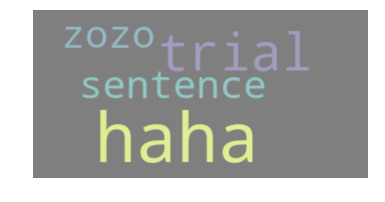

In [122]:
s="trial trial sentence sentence haha haha haha haha zozo zozo"
wc = WordCloud().generate(s)
plt.imshow(wc, interpolation="gaussian",alpha=0.5)
plt.axis('off')

In [115]:
help(plt.imshow)

Help on function imshow in module matplotlib.pyplot:

imshow(X, cmap=None, norm=None, aspect=None, interpolation=None, alpha=None, vmin=None, vmax=None, origin=None, extent=None, shape=None, filternorm=1, filterrad=4.0, imlim=None, resample=None, url=None, hold=None, data=None, **kwargs)
    Display an image on the axes.
    
    Parameters
    ----------
    X : array_like, shape (n, m) or (n, m, 3) or (n, m, 4)
        Display the image in `X` to current axes.  `X` may be an
        array or a PIL image. If `X` is an array, it
        can have the following shapes and types:
    
        - MxN -- values to be mapped (float or int)
        - MxNx3 -- RGB (float or uint8)
        - MxNx4 -- RGBA (float or uint8)
    
        The value for each component of MxNx3 and MxNx4 float arrays
        should be in the range 0.0 to 1.0. MxN arrays are mapped
        to colors based on the `norm` (mapping scalar to scalar)
        and the `cmap` (mapping the normed scalar to a color).
    
    cm